<a href="https://colab.research.google.com/github/Mikaner/reinforcement/blob/main/CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt -qq install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install JSAnimation
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'




In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = f":{display.display}"
# https://github.com/ponty/PyVirtualDisplay/issues/54

In [3]:
import gym
import numpy as np

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

In [10]:
# 動画の描画関数の宣言
# 参考URL: http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
#from IPython.display import display
from IPython.display import HTML

def make_anim(frames):
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), 
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)
    return anim

def save_frames_as_gif(frames):
    """
    DISPLAYs a list of frames as a gif, with controls
    """
    
    anim = make_anim(frames)
    anim.save('movie_cartpole.mp4')
    #display(display_animation(anim, default_mode='loop'))
    return anim.to_jshtml()

In [6]:
frames = []
env = gym.make('CartPole-v0')
observation = env.reset()

for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))
    action = np.random.choice(2)
    observation, reward, done, info = env.step(action)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


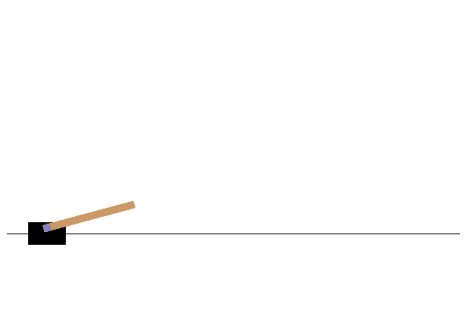

In [11]:
# display_frames_as_gif(frames) の代わり
HTML(save_frames_as_gif(frames))
# HTML(make_anim(frames)) # saveがいらない場合はこっち